In [1]:
#imprt the needed libraries 
import numpy as np
import pandas as pd #data processing
#import data
data = pd.read_csv("heart.csv")

In [2]:
##view information about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
#Split colum into feature and label
X = data[['chol','cp','thalach','trestbps','thal','ca','slope','oldpeak', 'exang','restecg','fbs','sex','age']]
y = data['target']

In [4]:
#view top 10 rows
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
#perform training and test split.We split data on 20% in the test dataset, the remaining 80% in the training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [6]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [7]:
#X_train after scalling
X_train

array([[ 0.31633659,  2.0440217 , -0.75655793, ..., -0.41119597,
         0.69617712, -1.07549434],
       [-0.80095086, -0.94181282, -1.80777525, ..., -0.41119597,
         0.69617712, -0.07531216],
       [-1.35959459,  1.04874353,  0.46986229, ..., -0.41119597,
        -1.43641607, -0.96436299],
       ...,
       [ 0.35486374,  0.05346536,  0.95167023, ..., -0.41119597,
         0.69617712, -0.63096893],
       [-0.6853694 , -0.94181282, -0.75655793, ..., -0.41119597,
         0.69617712,  1.03600138],
       [-0.1074621 ,  1.04874353, -0.01194565, ..., -0.41119597,
        -1.43641607, -1.1866257 ]])

In [8]:
#train our firt model witch is Random Forest 
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
#Model Evaluation
from sklearn.metrics import accuracy_score
y_predicted = RF.predict(X_test)
print("Accuracy for Random Forest Classifier :",accuracy_score(y_test,y_predicted))

Accuracy for Random Forest Classifier : 0.819672131147541


In [10]:
#Model Evaluation
from sklearn import metrics
#Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_predicted))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_predicted))
# F1 score is defined as the mean between precision and recall
print("F1 score:",metrics.f1_score(y_test, y_predicted))
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(RF, X_train, y_train, cv=10, scoring="accuracy")
print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(cv_score)))
from math import sqrt
from sklearn.metrics import mean_squared_error
scores=cross_val_score(RF,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
model_rmse_score=np.sqrt(-scores)
#Random Forest mean error
print("mean error",model_rmse_score.mean())

Precision: 0.7894736842105263
Recall: 0.9090909090909091
F1 score: 0.8450704225352113
Cross-Validation Score : 79.750%
mean error 0.41554002348058994


In [11]:
#Model Evaluation
#viwe the Confusion matrix
from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(y_test, y_predicted)
cm_RF

array([[20,  8],
       [ 3, 30]], dtype=int64)

In [12]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm_RF, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

In [13]:
#train our second model witch is Logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
#Model Evaluation
y_predicted = LR.predict(X_test)
print("Accuracy for Logistic Regression Classifier :",accuracy_score(y_test,y_predicted))

Accuracy for Logistic Regression Classifier : 0.819672131147541


In [15]:
#Model Evaluation
#Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_predicted))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_predicted))
# F1 score is defined as the mean between precision and recall
print("F1 score:",metrics.f1_score(y_test, y_predicted))
cv_score = cross_val_score(LR, X_train, y_train, cv=10, scoring="accuracy")
print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(cv_score)))
scores=cross_val_score(LR,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
model_rmse_score=np.sqrt(-scores)
#Logistic Regression mean error
print("mean error",model_rmse_score.mean())

Precision: 0.775
Recall: 0.9393939393939394
F1 score: 0.8493150684931509
Cross-Validation Score : 83.517%
mean error 0.3964644550455839


In [16]:
#Model Evaluation
#viwe the Confusion matrix
cm_LR = confusion_matrix(y_test, y_predicted)
cm_LR

array([[19,  9],
       [ 2, 31]], dtype=int64)

Text(69.0, 0.5, 'Truth')

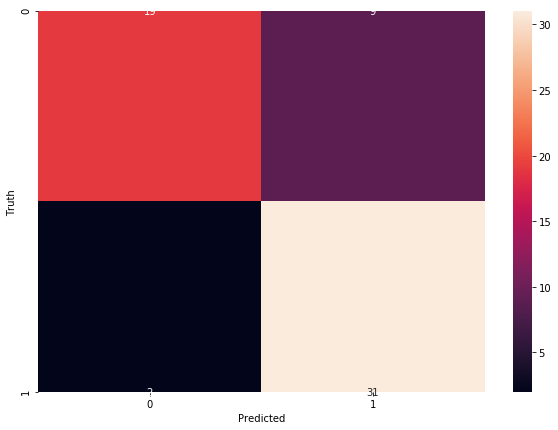

In [17]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_LR, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [18]:
#train our third model witch is Support vector machines
from sklearn.svm import SVC
svm = SVC() 
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
#Model Evaluation
y_predicted = svm.predict(X_test)
print("Accuracy for Support vector machines Classifier :",accuracy_score(y_test,y_predicted))

Accuracy for Support vector machines Classifier : 0.8360655737704918


In [20]:
#Model Evaluation
#Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_predicted))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_predicted))
# F1 score is defined as the mean between precision and recall
print("F1 score:",metrics.f1_score(y_test, y_predicted))
cv_score = cross_val_score(svm, X_train, y_train, cv=10, scoring="accuracy")
print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(cv_score)))
scores=cross_val_score(svm,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
model_rmse_score=np.sqrt(-scores)
#Logistic Regression mean error
print("mean error",model_rmse_score.mean())

Precision: 0.7948717948717948
Recall: 0.9393939393939394
F1 score: 0.8611111111111112
Cross-Validation Score : 81.817%
mean error 0.41634148808659405


In [21]:
#Model Evaluation
#viwe the Confusion matrix
cm_svm = confusion_matrix(y_test, y_predicted)
cm_svm

array([[20,  8],
       [ 2, 31]], dtype=int64)

Text(69.0, 0.5, 'Truth')

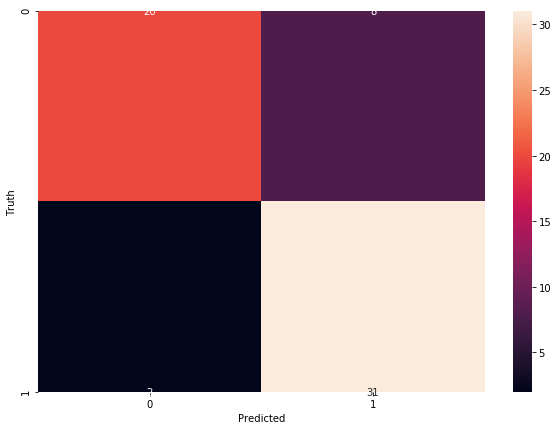

In [22]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_svm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
#train our fourth model witch is k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
y_predicted = knn.predict(X_test)
print("Accuracy for k-nearest neighbors Classifier :",accuracy_score(y_test,y_predicted))

Accuracy for k-nearest neighbors Classifier : 0.8032786885245902


In [25]:
#Model Evaluation
#Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_predicted))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_predicted))
# F1 score is defined as the mean between precision and recall
print("F1 score:",metrics.f1_score(y_test, y_predicted))
cv_score = cross_val_score(knn, X_train, y_train, cv=10, scoring="accuracy")
print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(cv_score)))
scores=cross_val_score(knn,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
model_rmse_score=np.sqrt(-scores)
# k-nearest neighbors mean error
print("mean error",model_rmse_score.mean())

Precision: 0.7692307692307693
Recall: 0.9090909090909091
F1 score: 0.8333333333333333
Cross-Validation Score : 82.650%
mean error 0.402735368484661


In [26]:
cm_knn = confusion_matrix(y_test, y_predicted)
cm_knn

array([[19,  9],
       [ 3, 30]], dtype=int64)

Text(69.0, 0.5, 'Truth')

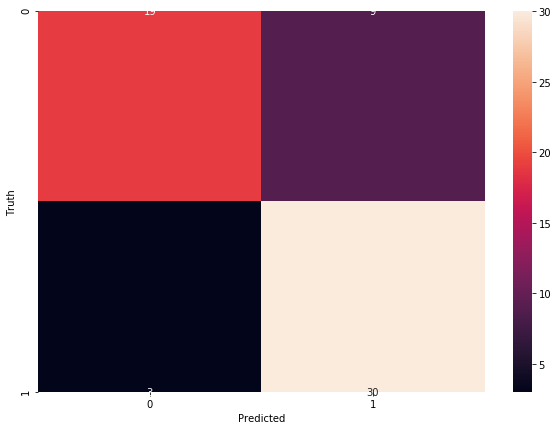

In [27]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_knn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
from sklearn.ensemble import VotingClassifier
Voting_Classifier=VotingClassifier(estimators=[('LR',LR),
                                              ('knn',knn),
                                               ('RF',RF),
                                              ('svm',svm)],voting='hard')
Voting_Classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                

In [29]:
y_predicted = Voting_Classifier.predict(X_test)
#accuracy score
print("Accuracy for Voting Classifier :",accuracy_score(y_test,y_predicted))


Accuracy for Voting Classifier : 0.8688524590163934


In [30]:
#Model Evaluation
#Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_predicted))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_predicted))
# F1 score is defined as the mean between precision and recall
print("F1 score:",metrics.f1_score(y_test, y_predicted))
cv_score = cross_val_score(Voting_Classifier, X_train, y_train, cv=10, scoring="accuracy")
print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(cv_score)))
scores=cross_val_score(Voting_Classifier,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
model_rmse_score=np.sqrt(-scores)
#Voting Classifie mean error
print("mean error",model_rmse_score.mean())

Precision: 0.8378378378378378
Recall: 0.9393939393939394
F1 score: 0.8857142857142858
Cross-Validation Score : 84.283%
mean error 0.37575893143738226


In [31]:
cm_VC= confusion_matrix(y_test, y_predicted)
cm_VC

array([[22,  6],
       [ 2, 31]], dtype=int64)

Text(69.0, 0.5, 'Truth')

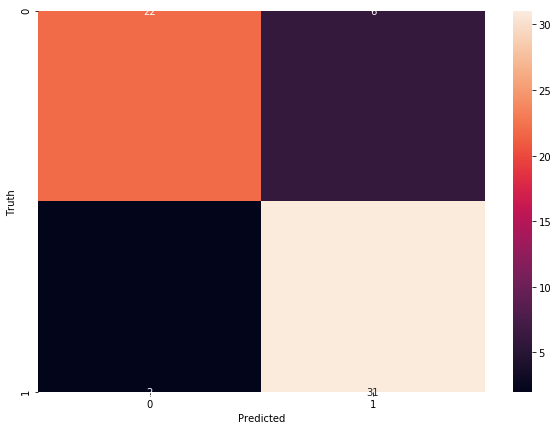

In [32]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_VC, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()

# Adding the input layer and the first hidden layer
#output_dim is number of node 
classifier.add(Dense(output_dim = 7,  activation = 'relu', input_shape=(13,)))

# Adding the second hidden layer

classifier.add(Dense(output_dim = 7, activation = 'relu'))

# Adding the output layer and use sigmoid activation function because we have binary predictions.
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# Compiling the ANN
#we have binary output we will use binary_crossentropy as loss function
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_shape=(13,), units=7)`
  import sys
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=7)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [34]:
classifier.fit(X_train, y_train, nb_epoch =100)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
242/242 [==============================] - 0s 953us/step - loss: 0.6587 - accuracy: 0.5785
Epoch 2/100
242/242 [==============================] - 0s 49us/step - loss: 0.6483 - accuracy: 0.6074
Epoch 3/100
242/242 [==============================] - 0s 49us/step - loss: 0.6391 - accuracy: 0.6364
Epoch 4/100
242/242 [==============================] - 0s 49us/step - loss: 0.6304 - accuracy: 0.6653
Epoch 5/100
242/242 [==============================] - 0s 45us/step - loss: 0.6217 - accuracy: 0.6901
Epoch 6/100
242/242 [==============================] - 0s 49us/step - loss: 0.6131 - accuracy: 0.7107
Epoch 7/100
242/242 [==============================] - 0s 54us/step - loss: 0.6049 - accuracy: 0.7273
Epoch 8/100
242/242 [==============================] - 0s 62us/step - loss: 0.5966 - accuracy: 0.7355
Epoch 9/100
242/242 [==============================] - 0s 49us/step - loss: 0.5881 - accuracy: 0.7438
Epoch 10/100
242/242 [==============================] - 0s 49us/step - loss: 0.58

In [35]:
y_predicted = classifier.predict(X_test).round()
#accuracy score
print("Accuracy for Artificial neural network :",accuracy_score(y_test,y_predicted))


Accuracy for Artificial neural network : 0.819672131147541


In [36]:
#Model Evaluation
#Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_predicted))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_predicted))
# F1 score is defined as the mean between precision and recall
print("F1 score:",metrics.f1_score(y_test, y_predicted))

Precision: 0.775
Recall: 0.9393939393939394
F1 score: 0.8493150684931509


In [37]:
cm6 = confusion_matrix(y_test, y_predicted)
cm6

array([[19,  9],
       [ 2, 31]], dtype=int64)

Text(69.0, 0.5, 'Truth')

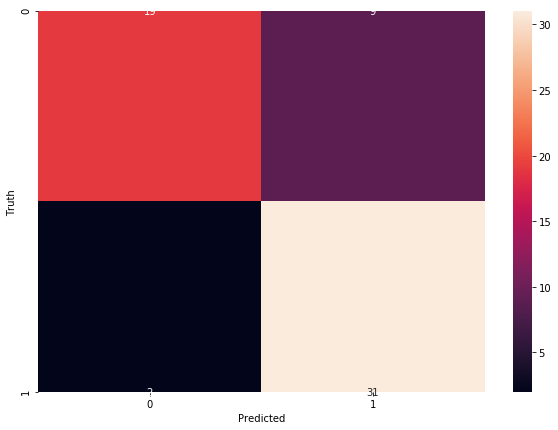

In [38]:
plt.figure(figsize = (10,7))
sn.heatmap(cm6, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')